# ![](https://julyedu-img-public.oss-cn-beijing.aliyuncs.com/Public/img/index/logo.png)

# Pandas教程
### 2019七月在线 机器学习集训营第八期 [@Julyedu.com七月在线 ](http://www.julyedu.com)
by 褚则伟 zeweichu@gmail.com

## 目录
- Groupby和Aggregate
- 表格的匹配与拼接
- bikes项目

## Groupby and Aggregate
### 2019七月在线 机器学习集训营第八期 julyedu.com

举个栗子，假设我们现在有一张公司每个员工的收入流水。

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
salaries = pd.DataFrame({
    'Name': ['July', 'Zewei', 'Zewei', 'Han', 'July', 'July', 'Zewei', 'July'],
    'Year': [2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary': [10000,2000,4000,5000,18000,25000,3000,4000],
    'Bonus': [3000,1000,1000,1200,4000,2300,500,1000]
})
print(salaries)

    Name  Year  Salary  Bonus
0   July  2016   10000   3000
1  Zewei  2016    2000   1000
2  Zewei  2016    4000   1000
3    Han  2016    5000   1200
4   July  2017   18000   4000
5   July  2017   25000   2300
6  Zewei  2017    3000    500
7   July  2017    4000   1000


接下来我给大家演示一下什么叫做Group By

In [2]:
group_by_name = salaries.groupby('Name')
group_by_name

groupby构造了一个GroupBy object

### groupby之后一般要做一些[aggregate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html)操作

In [3]:
group_by_name.sum()

,Year,Salary,Bonus
Name,,,
Han,2016,5000,1200
July,8067,57000,10300
Zewei,6049,9000,2500


默认会排序，也可以选择不排序

In [4]:
salaries.groupby('Name', sort=False).sum()

,Year,Salary,Bonus
Name,,,
July,8067,57000,10300
Zewei,6049,9000,2500
Han,2016,5000,1200


也可以这么写

In [5]:
group_by_name.aggregate(sum)

,Year,Salary,Bonus
Name,,,
Han,2016,5000,1200
July,8067,57000,10300
Zewei,6049,9000,2500


group by的attributes

In [6]:
print(group_by_name.groups)
print(len(group_by_name))

{'Han': Int64Index([3], dtype='int64'), 'July': Int64Index([0, 4, 5, 7], dtype='int64'), 'Zewei': Int64Index([1, 2, 6], dtype='int64')}
3


可以用多个columns做group by

In [7]:
group_by_name_year = salaries.groupby(['Name', 'Year'])
group_by_name_year.sum()

Salary  Bonus
Name  Year               
Han   2016    5000   1200
July  2016   10000   3000
      2017   47000   7300
Zewei 2016    6000   2000
      2017    3000    500

除了sum之外，我们再来尝试一下size,mean,median 

In [8]:
group_by_name_year.size()

Name   Year
Han    2016    1
July   2016    1
       2017    3
Zewei  2016    2
       2017    1
dtype: int64

In [9]:
group_by_name.mean()

,Year,Salary,Bonus
Name,,,
Han,2016.000000,5000.0,1200.000000
July,2016.750000,14250.0,2575.000000
Zewei,2016.333333,3000.0,833.333333


In [9]:
group_by_name.median()

,Year,Salary,Bonus
Name,,,
Han,2016,5000,1200
July,2017,14000,2650
Zewei,2016,3000,1000


In [10]:
group_by_name.describe()

Year                                                                 \
      count         mean      std     min      25%     50%     75%     max   
Name                                                                         
Han     1.0  2016.000000      NaN  2016.0  2016.00  2016.0  2016.0  2016.0   
July    4.0  2016.750000  0.50000  2016.0  2016.75  2017.0  2017.0  2017.0   
Zewei   3.0  2016.333333  0.57735  2016.0  2016.00  2016.0  2016.5  2017.0   

      Salary           ...                   Bonus                            \
       count     mean  ...      75%      max count         mean          std   
Name                   ...                                                     
Han      1.0   5000.0  ...   5000.0   5000.0   1.0  1200.000000          NaN   
July     4.0  14250.0  ...  19750.0  25000.0   4.0  2575.000000  1260.621540   
Zewei    3.0   3000.0  ...   3500.0   4000.0   3.0   833.333333   288.675135   

                                               
          min     25%     50%     75%     max  
Name                                           
Han    1200.0  1200.0  1200.0  1200.0  1200.0  
July   1000.0  1975.0  2650.0  3250.0  4000.0  
Zewei   500.0   750.0  1000.0  1000.0  1000.0  

[3 rows x 24 columns]

### iterate GroupBy object

In [11]:
for name, group in group_by_name:
    print(name)
    print(group)

Han
  Name  Year  Salary  Bonus
3  Han  2016    5000   1200
July
   Name  Year  Salary  Bonus
0  July  2016   10000   3000
4  July  2017   18000   4000
5  July  2017   25000   2300
7  July  2017    4000   1000
Zewei
    Name  Year  Salary  Bonus
1  Zewei  2016    2000   1000
2  Zewei  2016    4000   1000
6  Zewei  2017    3000    500


选择一个group

In [12]:
print(group_by_name.get_group("Zewei"))
type(group_by_name.get_group("Zewei"))

    Name  Year  Salary  Bonus
1  Zewei  2016    2000   1000
2  Zewei  2016    4000   1000
6  Zewei  2017    3000    500


pandas.core.frame.DataFrame

agg是aggregate的alias，可以替代使用

In [13]:
group_by_name.agg([np.sum, np.mean, np.std])

Year                       Salary                      Bonus  \
        sum         mean      std    sum   mean          std    sum   
Name                                                                  
Han    2016  2016.000000      NaN   5000   5000          NaN   1200   
July   8067  2016.750000  0.50000  57000  14250  9178.779875  10300   
Zewei  6049  2016.333333  0.57735   9000   3000  1000.000000   2500   

                                 
              mean          std  
Name                             
Han    1200.000000          NaN  
July   2575.000000  1260.621540  
Zewei   833.333333   288.675135

对每一列可以采用不同的aggregate操作

In [14]:
group_by_name.agg({"Bonus": np.sum, "Salary": np.sum})

,Bonus,Salary
Name,,
Han,1200,5000
July,10300,57000
Zewei,2500,9000


In [16]:
group_by_name.agg({"Bonus": np.sum, "Salary": np.sum, "Year": (lambda x: list(x)[0])})

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,2016
Zewei,2500,9000,2016


In [17]:
group_by_name_year.describe()

Salary                                                         \
            count          mean           std      min      25%      50%   
Name  Year                                                                 
Han   2016    1.0   5000.000000           NaN   5000.0   5000.0   5000.0   
July  2016    1.0  10000.000000           NaN  10000.0  10000.0  10000.0   
      2017    3.0  15666.666667  10692.676622   4000.0  11000.0  18000.0   
Zewei 2016    2.0   3000.000000   1414.213562   2000.0   2500.0   3000.0   
      2017    1.0   3000.000000           NaN   3000.0   3000.0   3000.0   

                             Bonus                                           \
                75%      max count         mean         std     min     25%   
Name  Year                                                                    
Han   2016   5000.0   5000.0   1.0  1200.000000         NaN  1200.0  1200.0   
July  2016  10000.0  10000.0   1.0  3000.000000         NaN  3000.0  3000.0   
      2017  21500.0  25000.0   3.0  2433.333333  1504.43788  1000.0  1650.0   
Zewei 2016   3500.0   4000.0   2.0  1000.000000     0.00000  1000.0  1000.0   
      2017   3000.0   3000.0   1.0   500.000000         NaN   500.0   500.0   

                                    
               50%     75%     max  
Name  Year                          
Han   2016  1200.0  1200.0  1200.0  
July  2016  3000.0  3000.0  3000.0  
      2017  2300.0  3150.0  4000.0  
Zewei 2016  1000.0  1000.0  1000.0  
      2017   500.0   500.0   500.0

### [transform](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transform.html)
transform会把group中的每一个record都按照同样的规则转化

In [18]:
nvda = pd.read_csv("data/NVDA.csv", index_col=0, parse_dates=[0])
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [19]:
nvda.groupby(nvda.index.year).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999,1.950782,2.007317,1.883559,1.947230,1.808134,6.433220e+06
2000,8.781084,9.222697,8.360522,8.778826,8.151729,1.104182e+07
2001,13.091254,13.600750,12.680548,13.181552,12.239956,2.782387e+07
2002,9.690344,9.955093,9.344391,9.614749,8.927940,3.168655e+07
2003,5.902434,6.042659,5.764960,5.900344,5.478865,2.430220e+07
2004,6.484735,6.608810,6.353558,6.465913,6.004034,1.706331e+07
2005,9.512381,9.659656,9.353175,9.513823,8.834223,1.542825e+07
2006,18.057902,18.425126,17.720279,18.095963,16.803316,1.534446e+07
2007,27.762045,28.251673,27.206056,27.724542,25.744098,1.514562e+07


In [20]:
zscore = lambda x:(x-x.mean())/x.std()

In [21]:
transformed = nvda.groupby(nvda.index.year).transform(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


用另一个function [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html#pandas.DataFrame.apply) 也可以起到同样的效果

In [22]:
transformed = nvda.groupby(nvda.index.year).apply(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


我们来尝试一下把这些数据画出来

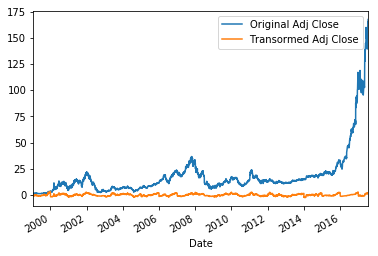

In [23]:
compare = pd.DataFrame({"Original Adj Close": nvda["Adj Close"], 
                        "Transormed Adj Close": transformed["Adj Close"]})
compare.plot()

In [24]:
price_range = lambda x: x.max() - x.min()
nvda.groupby(nvda.index.year).transform(price_range).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0


In [25]:
nvda.groupby(nvda.index.year).transform("max").head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-25,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-26,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-27,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-28,3.947917,3.953125,3.84375,3.911458,3.632052,67867200


### [filter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.filter.html)

比如我们想要找出符合统计特征的一些内容，就像SQL里面的having, where语句

In [26]:
s = pd.Series([1,1,2,2,2,3,4,4,5])
s.groupby(s).filter(lambda x: x.sum() > 4)

2    2
3    2
4    2
6    4
7    4
8    5
dtype: int64

In [27]:
df = pd.DataFrame({"A": np.arange(8), "B":list("aaabbbcc")})
df.groupby("B").filter(lambda x: len(x) > 2)

,A,B
0,0,a
1,1,a
2,2,a
3,3,b
4,4,b
5,5,b


我们来看看均价超过100的有哪些月份

In [28]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [29]:
key_month = lambda x: x[0:7]

In [30]:
nvda.groupby([nvda.index.year, nvda.index.month]).filter(lambda x: x["Adj Close"].mean() > 50).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-01,46.750000,47.360001,46.500000,46.660000,46.397064,5462200
2016-07-05,46.400002,47.430000,46.029999,47.349998,47.083176,9277100
2016-07-06,47.020000,47.930000,46.779999,47.650002,47.381493,6827600
2016-07-07,47.970001,49.060001,47.750000,48.889999,48.614498,9885000
2016-07-08,49.410000,51.090000,49.220001,50.849998,50.563454,12048300


### 小结： 
Group by: split-apply-combine
- 首先第一步是分离数据split，按照一定的规则把数据分成几类。
- 第二步是对每一部分数据都做一定的操作，这个操作可以是汇总操作aggregate，可以是一个变换transform，也可以是过滤数据filter。
- 最后一步就是把处理过的数据再合成一张DataFrame。


## 表格匹配与拼接
### 2019七月在线 机器学习集训营第八期 julyedu.com 
- concat
- append
- merge
- join

In [31]:
import pandas as pd
import numpy as np

In [32]:
df1 = pd.DataFrame({'apts': [55000, 60000],
                   'cars': [200000, 300000],},
                  index = ['Shanghai', 'Beijing'])
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [33]:
df2 = pd.DataFrame({'cars': [150000, 120000],
                    'apts': [25000, 20000],
                   },
                  index = ['Hangzhou', 'Najing'])
print(df2)

            cars   apts
Hangzhou  150000  25000
Najing    120000  20000


In [34]:
df3 = pd.DataFrame({'apts': [30000, 10000],
                   'cars': [180000, 100000],},
                  index = ['Guangzhou', 'Chongqing'])
print(df3)

            apts    cars
Guangzhou  30000  180000
Chongqing  10000  100000


### [concatenate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

In [35]:
frames = [df1, df2, df3] 
result = pd.concat(frames, sort=False)
print(result)

            apts    cars
Shanghai   55000  200000
Beijing    60000  300000
Hangzhou   25000  150000
Najing     20000  120000
Guangzhou  30000  180000
Chongqing  10000  100000


在concatenate的时候可以指定keys，这样可以给每一个部分加上一个Key。

以下的例子就构造了一个hierarchical index。

In [36]:
result2 = pd.concat(frames, keys=['x', 'y', 'z'], sort=False)
print(result2)

              apts    cars
x Shanghai   55000  200000
  Beijing    60000  300000
y Hangzhou   25000  150000
  Najing     20000  120000
z Guangzhou  30000  180000
  Chongqing  10000  100000


In [37]:
result2.loc["y"]

,apts,cars
Hangzhou,25000,150000
Najing,20000,120000


In [38]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index = ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [39]:
result3 = pd.concat([result, df4], axis=1, sort=False)
print(result3)

              apts      cars  salaries
Shanghai   55000.0  200000.0   30000.0
Beijing    60000.0  300000.0   30000.0
Hangzhou   25000.0  150000.0       NaN
Najing     20000.0  120000.0       NaN
Guangzhou  30000.0  180000.0   20000.0
Chongqing  10000.0  100000.0       NaN
Suzhou         NaN       NaN   10000.0
Tianjin        NaN       NaN   15000.0


用inner可以去掉NaN,也就是说如果出现了不匹配的行就会被忽略

In [40]:
result3 = pd.concat([result, df4], axis=1, join='inner')
print(result3)

            apts    cars  salaries
Shanghai   55000  200000     30000
Beijing    60000  300000     30000
Guangzhou  30000  180000     20000


#### 用[append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html)来做concatenation

In [41]:
print(df1.append(df2, sort=False))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Hangzhou  25000  150000
Najing    20000  120000


In [42]:
print(df1.append(df4, sort=False))

              apts      cars  salaries
Shanghai   55000.0  200000.0       NaN
Beijing    60000.0  300000.0       NaN
Suzhou         NaN       NaN   10000.0
Beijing        NaN       NaN   30000.0
Shanghai       NaN       NaN   30000.0
Guangzhou      NaN       NaN   20000.0
Tianjin        NaN       NaN   15000.0


Series和DataFrame还可以被一起concatenate，这时候Series会先被转成DataFrame然后做Join，因为Series本来就是一个只有一维的DataFrame对吧。

In [43]:
s1 = pd.Series([60, 50], index=['Shanghai', 'Beijing'], name='meal')
print(s1)

Shanghai    60
Beijing     50
Name: meal, dtype: int64


In [44]:
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [45]:
print(pd.concat([df1, s1], axis=1))

           apts    cars  meal
Shanghai  55000  200000    60
Beijing   60000  300000    50


下面讲如何append一个row到DataFrame里。

In [46]:
s2 = pd.Series([18000, 12000], index=['apts', 'cars'], name='Xiamen') #注意这里的name是必须要有的，因为要用作Index。
print(s2)

apts    18000
cars    12000
Name: Xiamen, dtype: int64


In [47]:
print(df1.append(s2))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Xiamen    18000   12000


### Merge(Join)
### 2019七月在线 机器学习集训营第八期 julyedu.com 

In [48]:
df1 = pd.DataFrame({'apts': [55000, 60000, 58000],
                   'cars': [200000, 300000,250000],
                  'city': ['Shanghai', 'Beijing','Shenzhen']})
print(df1)

    apts    cars      city
0  55000  200000  Shanghai
1  60000  300000   Beijing
2  58000  250000  Shenzhen


In [49]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000],
                  'city': ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin']})
print(df4)

   salaries       city
0     10000     Suzhou
1     30000    Beijing
2     30000   Shanghai
3     20000  Guangzhou
4     15000    Tianjin


In [50]:
result = pd.merge(df1, df4, on='city')
result

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000
1,60000,300000,Beijing,30000


In [51]:
result = pd.merge(df1, df4)
result

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000
1,60000,300000,Beijing,30000


In [52]:
result = pd.merge(df1, df4, on='city', how='outer')
print(result)

      apts      cars       city  salaries
0  55000.0  200000.0   Shanghai   30000.0
1  60000.0  300000.0    Beijing   30000.0
2  58000.0  250000.0   Shenzhen       NaN
3      NaN       NaN     Suzhou   10000.0
4      NaN       NaN  Guangzhou   20000.0
5      NaN       NaN    Tianjin   15000.0


In [53]:
result = pd.merge(df1, df4, on='city', how='right')
print(result)

      apts      cars       city  salaries
0  55000.0  200000.0   Shanghai     30000
1  60000.0  300000.0    Beijing     30000
2      NaN       NaN     Suzhou     10000
3      NaN       NaN  Guangzhou     20000
4      NaN       NaN    Tianjin     15000


In [54]:
result = pd.merge(df1, df4, on='city', how='left')
print(result)

    apts    cars      city  salaries
0  55000  200000  Shanghai   30000.0
1  60000  300000   Beijing   30000.0
2  58000  250000  Shenzhen       NaN


其实用concat也可以做同样的事情

In [55]:
pd.concat([df1.set_index("city"), df4.set_index('city')], sort=False, axis=1, join="inner")

,apts,cars,salaries
city,,,
Shanghai,55000,200000,30000
Beijing,60000,300000,30000


#### join on index

In [56]:
df1 = pd.DataFrame({'apts': [55000, 60000, 58000],
                   'cars': [200000, 300000,250000]},
                  index=['Shanghai', 'Beijing','Shenzhen'])
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Shenzhen  58000  250000


In [57]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index=['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [58]:
print(df1.join(df4))

           apts    cars  salaries
Shanghai  55000  200000   30000.0
Beijing   60000  300000   30000.0
Shenzhen  58000  250000       NaN


也可以用merge来写

In [59]:
pd.merge(df1, df4, left_index=True, right_index=True, how='outer')

,apts,cars,salaries
Beijing,60000.0,300000.0,30000.0
Guangzhou,NaN,NaN,20000.0
Shanghai,55000.0,200000.0,30000.0
Shenzhen,58000.0,250000.0,NaN
Suzhou,NaN,NaN,10000.0
Tianjin,NaN,NaN,15000.0


In [60]:
pd.concat([df1, df4], sort=False, axis=1)

,apts,cars,salaries
Shanghai,55000.0,200000.0,30000.0
Beijing,60000.0,300000.0,30000.0
Shenzhen,58000.0,250000.0,NaN
Suzhou,NaN,NaN,10000.0
Guangzhou,NaN,NaN,20000.0
Tianjin,NaN,NaN,15000.0


#### 下面我们来尝试一个稍微复杂一点的表格汇总+拼接项目

以下表格记录了用户对电影的评分

In [61]:
ratings = pd.read_csv("data/ratings_small.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [62]:
ratings.shape

(100004, 4)

我们来计算一下每部电影的平均分，以及有多少人打分。

In [63]:
ratings_mean = ratings.groupby("movieId").agg({"rating": np.mean, "timestamp": "count"}).rename(columns={"timestamp": "count"})
ratings_mean.head()

,rating,count
movieId,,
1,3.872470,247
2,3.401869,107
3,3.161017,59
4,2.384615,13
5,3.267857,56


In [64]:
ratings_mean.shape

(9066, 2)

下一张表格是每部电影的具体信息

In [65]:
meta = pd.read_csv("data/movies_metadata.csv")
meta.head()

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [66]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

我们只需要电影的ID和名字

In [67]:
meta[["id", "title"]].head()

,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [68]:
movie_titles = meta[["id", "title"]]
movie_titles.head()

,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [69]:
print(ratings_mean.shape)
print(movie_titles.shape)

(9066, 2)
(45466, 2)


在处理实际数据的时候，经常容易碰到脏数据，而怎么样处理脏数据其实就需要根据实际情况来决定了。

In [70]:
for i in range(movie_titles.shape[0]):
    try:
        int(movie_titles.loc[i, "id"])
    except ValueError:
        movie_titles.loc[i, "id"] = 99999999999999

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [71]:
movie_titles.loc[:, "id"] = pd.to_numeric(movie_titles.loc[:, "id"])

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


现在把电影的评分和电影名称表格拼接起来。

In [72]:
movie_name_ratings = pd.merge(ratings_mean, movie_titles, how="inner", left_index=True, right_on="id")
movie_name_ratings.head()

,rating,count,id,title
4342,3.401869,107,2,Ariel
12947,3.161017,59,3,Shadows in Paradise
17,3.267857,56,5,Four Rooms
474,3.884615,104,6,Judgment Night
256,3.689024,82,11,Star Wars


In [73]:
movie_name_ratings.sort_values(by=["count", "rating"], ascending=False).head(5)

,rating,count,id,title
6388,4.256173,324,296,Terminator 3: Rise of the Machines
4020,4.487138,311,318,The Million Dollar Hotel
3382,4.138158,304,593,Solaris
938,4.221649,291,260,The 39 Steps
5004,3.706204,274,480,Monsoon Wedding


## 项目时间
### 2019七月在线 机器学习集训营第八期 julyedu.com 
下面我们通过一个做股票分析的小项目带着大家熟悉一下pandas表格拼接和处理的操作。可参考以下博客文章。

[stock analysis](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/)

In [74]:
goog = pd.read_csv("data/GOOG.csv", index_col=0, parse_dates=["Date"])
goog.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

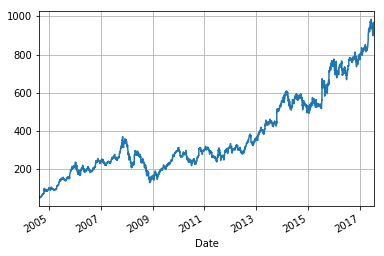

In [75]:
goog["Adj Close"].plot(grid = True)

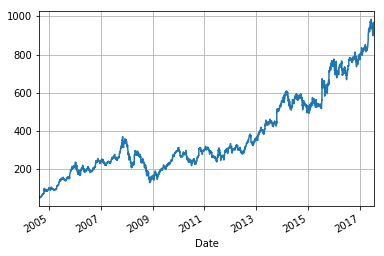

In [76]:
goog["Close"].plot(grid = True)

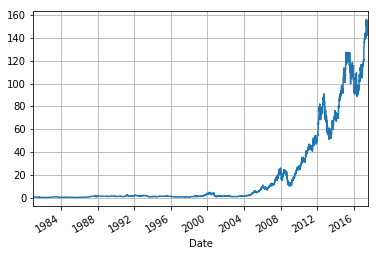

In [77]:
aapl = pd.read_csv("data/AAPL.csv", index_col=0, parse_dates=[0])
aapl["Adj Close"].plot(grid=True)

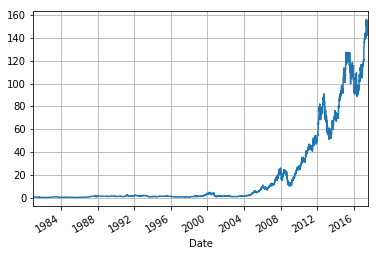

In [78]:
aapl["Adj Close"].plot(grid=True)

In [79]:
msft = pd.read_csv("data/MSFT.csv", index_col=0, parse_dates=[0])

尝试一下把三张表格拼接到一起

In [80]:
stocks = pd.concat([aapl["Adj Close"], msft["Adj Close"], goog["Adj Close"]], axis=1)
stocks.columns = ["AAPL", "MSFT", "GOOG"]
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
1980-12-12,0.423252,NaN,NaN
1980-12-15,0.401170,NaN,NaN
1980-12-16,0.371726,NaN,NaN
1980-12-17,0.380927,NaN,NaN
1980-12-18,0.391969,NaN,NaN


In [81]:
stocks = pd.DataFrame({"AAPL": aapl["Adj Close"].bfill(),
                      "MSFT": msft["Adj Close"].bfill(),
                      "GOOG": goog["Adj Close"].bfill()})

In [82]:
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
1980-12-12,0.423252,NaN,NaN
1980-12-15,0.401170,NaN,NaN
1980-12-16,0.371726,NaN,NaN
1980-12-17,0.380927,NaN,NaN
1980-12-18,0.391969,NaN,NaN


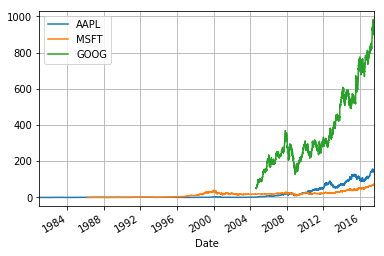

In [83]:
# stocks = pd.to_numeric(stocks)
stocks.plot(grid=True)

In [84]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()]

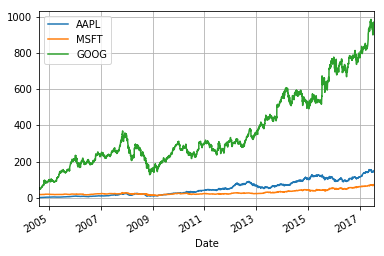

In [85]:
valid_stocks.plot(grid=True)

AAPL    float64
MSFT    float64
GOOG    float64
dtype: object

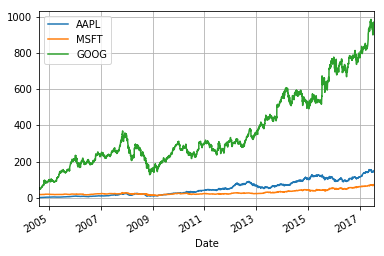

In [86]:
valid_stocks.plot(grid=True)
valid_stocks.dtypes

如果我们想要画出月K线呢？

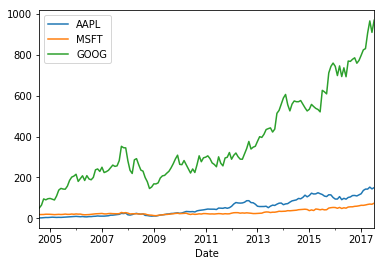

In [87]:
monthly_stocks = valid_stocks.resample("M").last()
monthly_stocks.plot()

### 2019七月在线 机器学习集训营第八期 julyedu.com

处理实际数据的时候，很多时候时间都花在处理脏数据上。

我们来尝试一个例子，读取一些自行车的数据。

bikes.csv记录了Montreal自行车路线的数据，具体有7条路线，分别记录了每条自行车路线每天有多少人经过。

In [97]:
# bikes = pd.read_csv("data/bikes.csv")

怎么报错了？不要慌，我们Google一下这个错误是什么意思。

In [89]:
bikes = pd.read_csv("data/bikes.csv", encoding="latin-1")
bikes.head()

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


这个数据读进来都揉成一团了，为什么呢？因为这个数据的格式并不是用逗号分隔的，而是用分号分隔的。所以我们要声明一下sep

In [90]:
bikes = pd.read_csv('data/bikes.csv', sep=';', parse_dates=['Date'], \
                    encoding='latin1', dayfirst=True, index_col='Date')
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


这样读进来的数据就正常了，还有一个问题，就是数据看起来有好多的NaN。dropna可以帮我们删掉一些带NA的行或者列。

In [91]:
bikes.shape

(310, 9)

In [92]:
bikes.dropna()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,


In [93]:
bikes.dropna(how = "all").head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [94]:
bikes.dropna(how = "all").shape

(310, 9)

dropna默认是删掉行，如果想删掉一列，就要声明一下axis参数

In [95]:
bikes.dropna(how="all", axis=1).head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [96]:
bikes.dropna(how="all", axis=1).shape

(310, 7)

对于缺失的数据，我们未必要直接删除，可以考虑用[fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)把这一行的平均数填上。

In [97]:
bikes.mean(1).head()

Date
2012-01-01     25.142857
2012-01-02     58.142857
2012-01-03     91.285714
2012-01-04    108.428571
2012-01-05    122.571429
dtype: float64

In [98]:
bikes.fillna(bikes.mean(1)).head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [99]:
bikes.T.fillna(bikes.T.mean(0)).T.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35.0,25.142857,0.0,38.0,51.0,26.0,10.0,16.0,25.142857
2012-01-02,83.0,58.142857,1.0,68.0,153.0,53.0,6.0,43.0,58.142857
2012-01-03,135.0,91.285714,2.0,104.0,248.0,89.0,3.0,58.0,91.285714
2012-01-04,144.0,108.428571,1.0,116.0,318.0,111.0,8.0,61.0,108.428571
2012-01-05,197.0,122.571429,2.0,124.0,330.0,97.0,13.0,95.0,122.571429


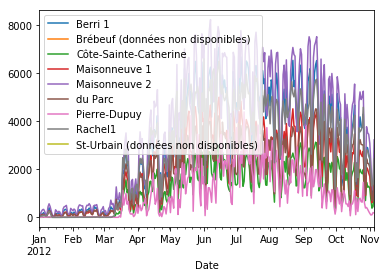

In [100]:
%matplotlib inline
bikes.plot()

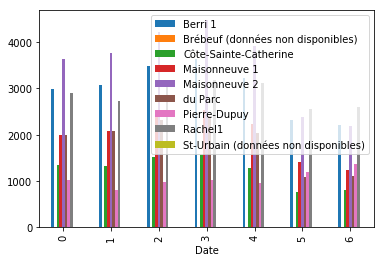

In [101]:
bikes.groupby(bikes.index.weekday).mean().plot(kind="bar")

最后我们再来求平均，看看一周当中每天总共有多少自行车通过